# NFIR Model - Overview

Example created by Wilson Rocha Lacerda Junior

> **Looking for more details on NARMAX models?**
> For comprehensive information on models, methods, and a wide range of examples and benchmarks implemented in SysIdentPy, check out our book:
> [*Nonlinear System Identification and Forecasting: Theory and Practice With SysIdentPy*](https://sysidentpy.org/book/0%20-%20Preface/)
>
> This book provides in-depth guidance to support your work with SysIdentPy.

This example shows how to use SysIdentPy to build NFIR models. NFIR models are models with no output feedback. In other words, there are no $y(k-n_y)$ regressors, only $x(k-n_x)$.

The NFIR model can be described as:

$$
    y_k= F^\ell[x_{k-d}, x_{k-d-1}, \dotsc, x_{k-d-n_x}, e_{k-1}, \dotsc, e_{k-n_e}] + e_k
$$

where $n_x \in \mathbb{N}$ is the maximum lag for the system input; $x_k \in \mathbb{R}^{n_x}$ is the system input at discrete time $k \in \mathbb{N}^n$; $e_k \in \mathbb{R}^{n_e}$ stands for uncertainties and possible noise at discrete time $k$. In this case, $\mathcal{F}^\ell$ is some nonlinear function of the input regressors with nonlinearity degree $\ell \in \mathbb{N}$ and $d$ is a time delay typically set to $d=1$.

It is important to note that NFIR model size is generally significantly higher compared to their counterpart NARMAX model size. This drawback can be noted in linear models dimensionality and it leads to even more complex scenarios in the nonlinear case.

So, if you are looking for parsimonious and compact models, consider using NARMAX models. However, when comparing NFIR and NARMAX models, it's generally more challenging to establish stability, particularly in a control-oriented context, with NARMAX models than with NFIR models.

In [ ]:
pip install sysidentpy

In [9]:
import pandas as pd
import numpy as np
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.basis_function import Polynomial
from sysidentpy.parameter_estimation import LeastSquares, RecursiveLeastSquares
from sysidentpy.utils.display_results import results
from sysidentpy.utils.plotting import plot_results
from sysidentpy.model_structure_selection import AOLS, FROLS

NFIR x NARMAX

We will reproduce the same example provided in the ["presenting main functionality section"](https://sysidentpy.org/examples/basic_steps/). In that example, we use a NARX model with xlag and ylag equal to 2 and a nonlinearity degree equal to 2. That resulted in a model with 3 regressors and a RRSE (validation metric) equal to $0.000184$

| Regressors    | Parameters   | ERR            |
|---------------|--------------|----------------|
| x1(k-2)       | 9.0001E-01   | 9.57505011E-01 |
| y(k-1)        | 2.0001E-01   | 3.89117583E-02 |
| x1(k-1)y(k-1) | 9.9992E-02   | 3.58319976E-03 |

### So, what happens if I use a NFIR model with the same configuration?


C:\Users\wilso\Desktop\projects\GitHub\sysidentpy\sysidentpy\model_structure_selection\forward_regression_orthogonal_least_squares.py:618: UserWarning: n_info_values is greater than the maximum number of all regressors space considering the chosen y_lag, u_lag, and non_degree. We set as 6
  self.info_values = self.information_criterion(reg_matrix, y)


0.2129700627690414
  Regressors  Parameters             ERR
0    x1(k-2)  8.9017E-01  9.55432286E-01


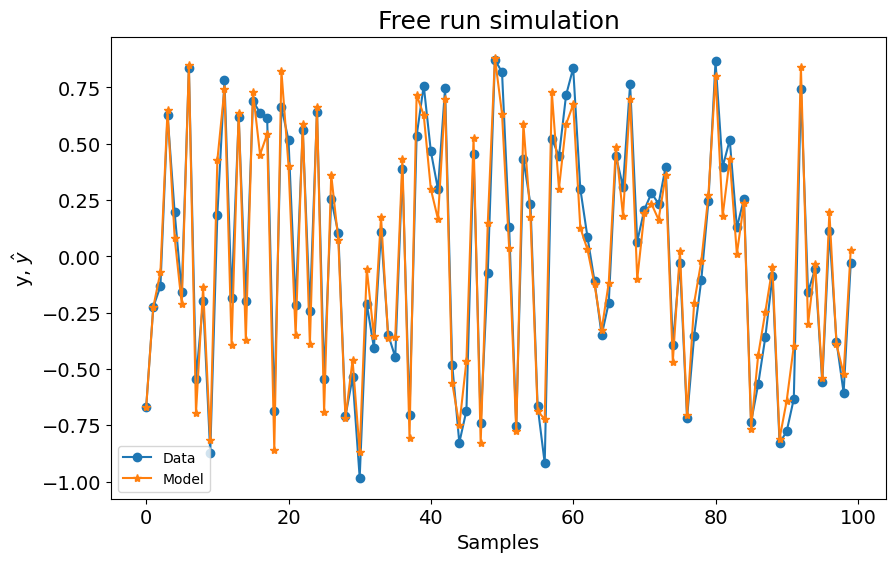

In [3]:
np.random.seed(seed=42)
# generating simulated data
x_train, x_test, y_train, y_test = get_siso_data(
    n=1000, colored_noise=False, sigma=0.001, train_percentage=90
)

basis_function = Polynomial(degree=2)
estimator = LeastSquares()
model = FROLS(
    order_selection=True,
    xlag=2,
    info_criteria="aic",
    estimator=estimator,
    basis_function=basis_function,
    model_type="NFIR",
)

model.fit(X=x_train, y=y_train)
yhat = model.predict(X=x_test, y=y_test)
rrse = root_relative_squared_error(y_test, yhat)
print(rrse)

r = pd.DataFrame(
    results(
        model.final_model,
        model.theta,
        model.err,
        model.n_terms,
        err_precision=8,
        dtype="sci",
    ),
    columns=["Regressors", "Parameters", "ERR"],
)
print(r)

plot_results(y=y_test, yhat=yhat, n=1000)

In the NFIR case, we got a model with 1 regressor, but with significantly worse RRSE ($0.21$)

| Regressors | Parameters  | ERR            |
|------------|-------------|----------------|
| x1(k-2)    | 8.9017E-01  | 9.55432286E-01 |


So, to get a better NFIR model, we have to set a higher order model. In other words, we have to set a higher maximum lag to build the model.

Lets set xlag=3.

0.04314951932710626
       Regressors  Parameters             ERR
0         x1(k-2)  8.9980E-01  9.55367779E-01
1         x1(k-3)  1.7832E-01  3.94348076E-02
2  x1(k-3)x1(k-1)  9.1104E-02  3.33315478E-03


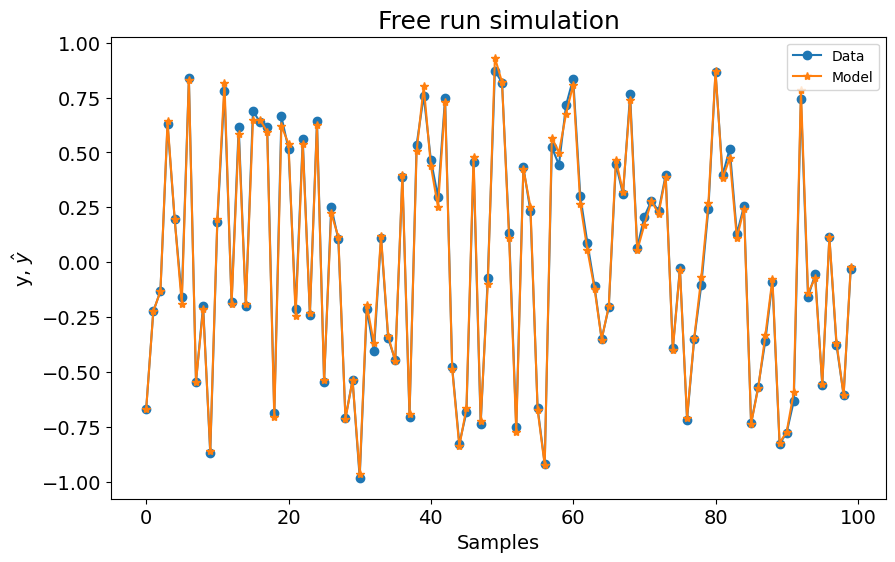

In [4]:
np.random.seed(seed=42)
# generating simulated data
x_train, x_test, y_train, y_test = get_siso_data(
    n=1000, colored_noise=False, sigma=0.001, train_percentage=90
)

basis_function = Polynomial(degree=2)
estimator = LeastSquares()
model = FROLS(
    order_selection=True,
    xlag=3,
    info_criteria="aic",
    estimator=estimator,
    basis_function=basis_function,
    model_type="NFIR",
)

model.fit(X=x_train, y=y_train)
yhat = model.predict(X=x_test, y=y_test)
rrse = root_relative_squared_error(y_test, yhat)
print(rrse)

r = pd.DataFrame(
    results(
        model.final_model,
        model.theta,
        model.err,
        model.n_terms,
        err_precision=8,
        dtype="sci",
    ),
    columns=["Regressors", "Parameters", "ERR"],
)
print(r)

plot_results(y=y_test, yhat=yhat, n=1000)

Now, the model have 3 regressors, but the RRSE is still worse ($0.04$).

| Regressors      | Parameters  | ERR            |
|-----------------|-------------|----------------|
| x1(k-2)         | 8.9980E-01  | 9.55367779E-01 |
| x1(k-3)         | 1.7832E-01  | 3.94348076E-02 |
| x1(k-3)x1(k-1)  | 9.1104E-02  | 3.33315478E-03 |

Lets set xlag=5.

0.004209451216121233
       Regressors  Parameters             ERR
0         x1(k-2)  8.9978E-01  9.55485306E-01
1         x1(k-3)  1.7979E-01  3.93181813E-02
2  x1(k-3)x1(k-1)  8.9706E-02  3.33141271E-03
3         x1(k-4)  3.5772E-02  1.54789285E-03
4  x1(k-4)x1(k-2)  1.7615E-02  1.09675506E-04
5  x1(k-4)x1(k-1)  1.7871E-02  1.13215338E-04
6         x1(k-5)  6.9594E-03  6.23773643E-05
7  x1(k-5)x1(k-1)  4.1353E-03  6.10794551E-06
8  x1(k-5)x1(k-3)  3.4007E-03  3.98364615E-06
9  x1(k-5)x1(k-2)  2.9798E-03  3.42693984E-06


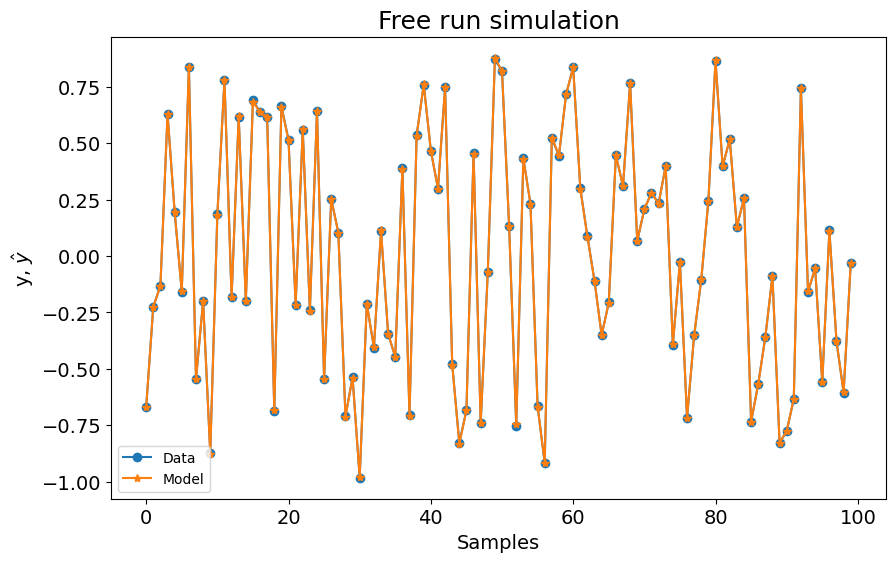

In [6]:
np.random.seed(seed=42)
# generating simulated data
x_train, x_test, y_train, y_test = get_siso_data(
    n=1000, colored_noise=False, sigma=0.001, train_percentage=90
)

basis_function = Polynomial(degree=2)
estimator = LeastSquares()
model = FROLS(
    order_selection=True,
    xlag=5,
    info_criteria="aic",
    estimator=estimator,
    basis_function=basis_function,
    model_type="NFIR",
    err_tol=None,
)

model.fit(X=x_train, y=y_train)
yhat = model.predict(X=x_test, y=y_test)
rrse = root_relative_squared_error(y_test, yhat)
print(rrse)

r = pd.DataFrame(
    results(
        model.final_model,
        model.theta,
        model.err,
        model.n_terms,
        err_precision=8,
        dtype="sci",
    ),
    columns=["Regressors", "Parameters", "ERR"],
)
print(r)

plot_results(y=y_test, yhat=yhat, n=1000)

Now the RRSE is closer to the NARMAX model, but the NFIR model have 10 regressors. So, as mentioned before, the order of NFIR models is generally higher than NARMAX model to get comparable results.

| Regressors      | Parameters  | ERR            |
|-----------------|-------------|----------------|
| x1(k-2)         | 8.9978E-01  | 9.55485306E-01 |
| x1(k-3)         | 1.7979E-01  | 3.93181813E-02 |
| x1(k-3)x1(k-1)  | 8.9706E-02  | 3.33141271E-03 |
| x1(k-4)         | 3.5772E-02  | 1.54789285E-03 |
| x1(k-4)x1(k-2)  | 1.7615E-02  | 1.09675506E-04 |
| x1(k-4)x1(k-1)  | 1.7871E-02  | 1.13215338E-04 |
| x1(k-5)         | 6.9594E-03  | 6.23773643E-05 |
| x1(k-5)x1(k-1)  | 4.1353E-03  | 6.10794551E-06 |
| x1(k-5)x1(k-3)  | 3.4007E-03  | 3.98364615E-06 |
| x1(k-5)x1(k-2)  | 2.9798E-03  | 3.42693984E-06 |

xlag = 35

0.0033427508754120074
        Regressors  Parameters             ERR
0          x1(k-2)  9.0009E-01  9.55386378E-01
1          x1(k-3)  1.8001E-01  3.94178379E-02
2   x1(k-3)x1(k-1)  9.0886E-02  3.32874170E-03
3          x1(k-4)  3.5412E-02  1.54540871E-03
4   x1(k-4)x1(k-2)  1.8743E-02  1.12751104E-04
5   x1(k-4)x1(k-1)  1.8378E-02  1.13878189E-04
6          x1(k-5)  6.7236E-03  6.27406151E-05
7   x1(k-5)x1(k-1)  4.4974E-03  6.32909200E-06
8   x1(k-5)x1(k-3)  3.5420E-03  3.95779051E-06
9   x1(k-5)x1(k-2)  5.5656E-03  3.39231220E-06
10         x1(k-6)  1.5079E-03  2.37202762E-06
11  x1(k-6)x1(k-2)  1.8768E-03  3.65196792E-07
12  x1(k-6)x1(k-3)  1.0685E-03  2.92529290E-07
13  x1(k-6)x1(k-1)  6.3191E-04  2.55676107E-07


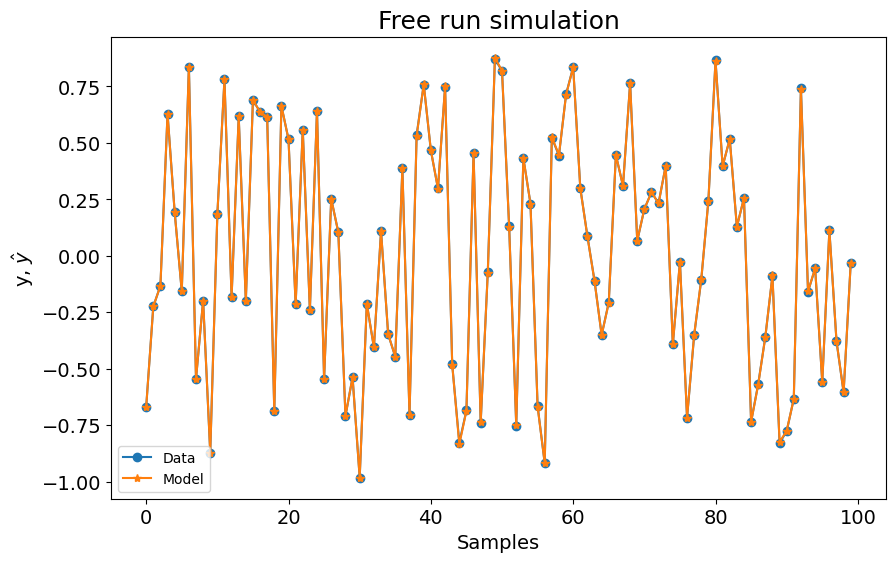

In [10]:
np.random.seed(seed=42)
# generating simulated data
x_train, x_test, y_train, y_test = get_siso_data(
    n=1000, colored_noise=False, sigma=0.001, train_percentage=90
)

basis_function = Polynomial(degree=2)
estimator = RecursiveLeastSquares()
model = FROLS(
    order_selection=True,
    xlag=35,
    n_info_values=200,
    info_criteria="aic",
    estimator=estimator,
    basis_function=basis_function,
    model_type="NFIR",
    err_tol=None,
)

model.fit(X=x_train, y=y_train)
yhat = model.predict(X=x_test, y=y_test)
rrse = root_relative_squared_error(y_test, yhat)
print(rrse)

r = pd.DataFrame(
    results(
        model.final_model,
        model.theta,
        model.err,
        model.n_terms,
        err_precision=8,
        dtype="sci",
    ),
    columns=["Regressors", "Parameters", "ERR"],
)
print(r)

plot_results(y=y_test, yhat=yhat, n=1000)

Now the RRSE is closer to the NARMAX model, but the NFIR model have 14 regressors, with `RRSE=0.0033`. So, as you can check in these examples, the order of NFIR models is generally higher than NARMAX model to get comparable results, even trying different parameter estimation algorithms

| Regressors        | Parameters  | ERR             |
|-------------------|-------------|-----------------|
| x1(k-2)           | 9.0009E-01  | 9.55386378E-01  |
| x1(k-3)           | 1.8001E-01  | 3.94178379E-02  |
| x1(k-3)x1(k-1)    | 9.0886E-02  | 3.32874170E-03  |
| x1(k-4)           | 3.5412E-02  | 1.54540871E-03  |
| x1(k-4)x1(k-2)    | 1.8743E-02  | 1.12751104E-04  |
| x1(k-4)x1(k-1)    | 1.8378E-02  | 1.13878189E-04  |
| x1(k-5)           | 6.7236E-03  | 6.27406151E-05  |
| x1(k-5)x1(k-1)    | 4.4974E-03  | 6.32909200E-06  |
| x1(k-5)x1(k-3)    | 3.5420E-03  | 3.95779051E-06  |
| x1(k-5)x1(k-2)    | 5.5656E-03  | 3.39231220E-06  |
| x1(k-6)           | 1.5079E-03  | 2.37202762E-06  |
| x1(k-6)x1(k-2)    | 1.8768E-03  | 3.65196792E-07  |
| x1(k-6)x1(k-3)    | 1.0685E-03  | 2.92529290E-07  |
| x1(k-6)x1(k-1)    | 6.3191E-04  | 2.55676107E-07  |
